In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
methods = ['plink', 'linarg']
times = {
    'plink': 0,
    'linarg_load': 0,
    'linarg_gwas': 0,
         }

method = 'plink'
plink_peak_mem = []
for chrom in [1, 11, 21]:
    df = pd.read_csv(f'/Users/ambershen/Desktop/linARG/dx_analysis/figures/4d/data/plink_chr{chrom}_100phenoGWAS.csv')
    times[method] += np.mean(df.wall_time_seconds)
    plink_peak_mem.append(np.max(list(df.peak_memory_MB)))
    

method = 'linarg'
linarg_peak_mem = []
for chrom in [1, 11, 21]:
    df = pd.read_csv(f'/Users/ambershen/Desktop/linARG/dx_analysis/figures/4d/data/linarg_chr{chrom}_100phenoGWAS.csv')
    times['linarg_load'] += np.sum(df.load_time) 
    times['linarg_gwas'] += np.sum(df.gwas_time)
    linarg_peak_mem.append(max(list(df.gwas_memory)))
    
print(times)
print(plink_peak_mem, linarg_peak_mem)

{'plink': 297173.0, 'linarg_load': 275.9692774880007, 'linarg_gwas': 2356.072407728}
[31998.72, 31998.13, 31999.69] [58380.68359375, 67339.89453125, 61701.88671875]


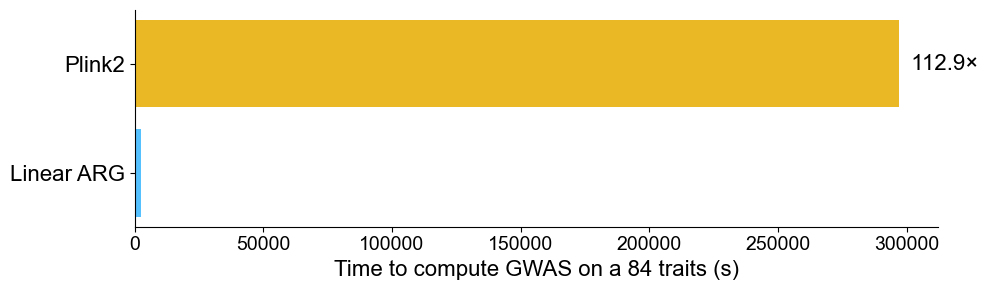

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.rcParams['font.family'] = 'Arial'

colors = ['#56C1FF', '#E9B824']

hatches = ['///', ''] 

fig, ax = plt.subplots(figsize=(10, 3))


ax.barh(0, times['linarg_load']+times['linarg_gwas'], color=colors[0], hatch=hatches[1], label='Load Time')
ax.barh(1, times['plink'], color=colors[1], hatch=hatches[1])

ax.set_yticks([0 ,1])
ax.set_yticklabels(['Linear ARG', 'Plink2'], fontsize=16)

ax.set_xlabel('Time to compute GWAS on a 84 traits (s)', fontsize=16)

speedup = times['plink'] / (times['linarg_load']+times['linarg_gwas'])
ax.text(times['plink'] + 0.05, 1, f"  {speedup:.1f}×", va='center', fontsize=16)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tick_params(axis='x', labelsize=14)


plt.tight_layout()
plt.show()


In [40]:
52537218 + 32741456 + 8463893

93742567

In [ ]:
mem3_ssd1_v2_x8 = 0.3208/3600